<a href="https://colab.research.google.com/github/emianaamos/Portfolio-Optimization/blob/main/Portfolio_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas_datareader

In [25]:
pip install yfinance


     |████████████████████████████████| 6.3 MB 12.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=fe1baffbb1f96a5a702205675ab38f6208b6ecde4d72f014236bc884fe511169
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


What is Portfolio Optimization?

Portfolio optimization is nothing but a process where an investor receives the right guidance with respect to selection of assets from the range of other options and in this theory projects/programs are not valued on an individual basis rather the same is valued as a part of a particular portfolio.

In [42]:
from pandas_datareader import data as web
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime as dt

Process of Optimal Portfolio
Asset Allocation
 
 for an optimal portfolio is essentially a two-part process:

1. Selecting Asset Classes – Portfolio managers
 first choose the asset classes that they want to allocate funds to, and then they decide the weight of every asset class be included. Common asset classes include Equities, Bonds, Gold, Real Estate.
2. Selecting Assets within Class – After deciding the asset classes, the manager decides how much of a particular stock or a bond does she want to include in the portfolio. The Efficient Frontier represents on a graph the risk-return relationship of an efficient portfolio. Each point on this curve represents an efficient portfolio.

In [30]:
# Get the stock tickers 

tickers = ['AMZN', 'AAPL','GOOG', 'NFLIX']


In [33]:
stock = pd.DataFrame()

start = dt.datetime.now() - dt.timedelta(days=365 * 5)
today = dt.datetime.now()


In [34]:
for stocks in tickers:
  stock[stocks] = yf.download(stocks, data_source='yahoo',start= start, end=today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


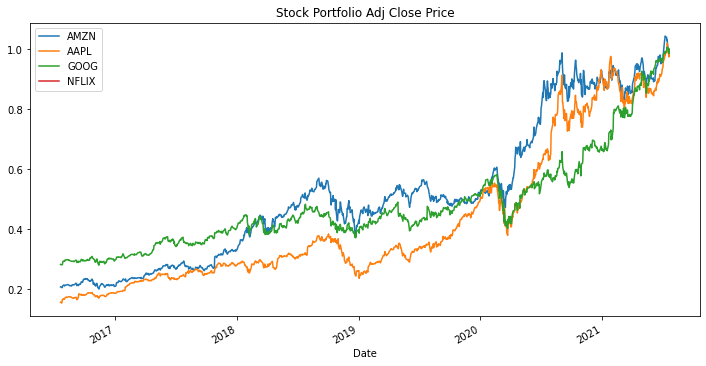

In [37]:
 (stock/stock.iloc[-1]).plot(figsize=(12,6))
 plt.title('Stock Portfolio Adj Close Price')
 plt.show()


In [38]:
# show the daily return

returns = stock.pct_change()

#show
returns

,AMZN,AAPL,GOOG,NFLIX
Date,,,,
2016-07-22,NaN,NaN,NaN,NaN
2016-07-25,-0.007048,-0.013379,-0.003999,-0.002698
2016-07-26,-0.005435,-0.006883,-0.001825,0.000902
2016-07-27,0.001468,0.064963,0.004537,0.000901
2016-07-28,0.021638,0.013502,0.005581,0.000000
...,...,...,...,...
2021-07-14,0.001175,0.024100,0.008306,0.000000
2021-07-15,-0.013711,-0.004492,-0.006178,0.000000
2021-07-16,-0.015854,-0.014076,0.004411,0.000000


In [39]:
#calculating the annualized covariance matrix
cov_matrix = returns.cov()*252 

#show
cov_matrix

,AMZN,AAPL,GOOG,NFLIX
AMZN,0.085280,0.055852,0.052273,0.000154
AAPL,0.055852,0.091992,0.053299,0.001012
GOOG,0.052273,0.053299,0.071085,0.000606
NFLIX,0.000154,0.001012,0.000606,0.012978


Asset Weighting

When optimizing your portfolio, you assign  an ‘optimization weight’ for each asset class and all assets within that class. The weight is the percentage of the portfolio that concentrates within any particular class. For example, say we weight stocks at 10% and bonds at 20%. This means bonds are twice as important to our portfolio as stocks. So, we could then assign sub-weights to slow-growth stocks and fast-growth stocks at 20% and 10%, respectively. Any stocks selected for this portfolio would need to establish and maintain these ratios.

You assign asset weights based upon your risk and return tolerance. If you hope to minimize risk you would assign greater weight to low-risk, low-growth assets. This is what we have done in the above example by assigning twice as much weight to safe investments as profitable ones.

In [77]:
# Investing each weight to the portfolio
weights = np.array([0.25,0.25,0.25,0.25])

Calculating Asset Weight

Now we need to calculate our weights. In a non-optimized portfolio, we might place too much money in Stock, thus reducing our possible returns, or over-invest in Stock, which would create too much risk. 

In [50]:
# calculating portfolio variance
pfolio_variance = np.dot( weights.T, np.dot(cov_matrix, weights))

#show
print('Expected Portfolio Variance',pfolio_variance)

Expected Portfolio Variance 0.03673281724240901


In [52]:
stock.shape

(1257, 4)

What Is Risk?

Risk is the chance that you’ll lose money on an investment or won’t see the returns that you expected. However, investors also measure risk through volatility, which refers to the likelihood an asset’s price will change significantly.

In [55]:
pfolio_risk = pfolio_variance ** 0.5

print('Expected Portfolio Risk')
#show results
print(pfolio_risk)

Expected Portfolio Risk
0.19165807377308428


In [60]:
# calculate the annual returns
pfolio_annual_return = np.sum(returns.mean() * weights) * 252

#show
print('Annual Portfolio Return',pfolio_annual_return)

Annual Portfolio Return 0.25355469089421445



An optimal portfolio is said to be the one that has the highest Sharpe ratio
, which measures the excess return generated for every unit of risk taken.

Portfolio optimization is based on Modern Portfolio Theory (MPT
). The MPT is based on the principle that investors want the highest return for the lowest risk. To achieve this, assets in a portfolio should be selected after considering how they perform relative to each other, i.e.; they should have a low correlation. Any optimal portfolio based on the MPT is well-diversified in order to avoid a crash when a particular asset or asset class underperforms.

In [76]:
# sharpe ratio
rf= 0.08

pfolio_sharpe = (pfolio_annual_return - rf)/ pfolio_risk

print('Sharpe Ratio of Stock Portfolio:', pfolio_sharpe )

Sharpe Ratio of Stock Portfolio: 0.905543332861085


In [62]:
# Markowitz Portfolio Efficient Frontier

pfolio_returns = []
pfolio_volatilities = []
tickers = ['AMZN', 'AAPL','GOOG', 'NFLIX']
num_assets =len(tickers)

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 250, weights))))

# converting to numpy arrays
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities 

(array([0.32896218, 0.18379052, 0.24875659, 0.24301462, 0.16294623,
        0.2995065 , 0.32618731, 0.22840011, 0.18401622, 0.28916314,
        0.30124643, 0.19430304, 0.24034882, 0.26871185, 0.21159474,
        0.1283084 , 0.2552896 , 0.23047788, 0.23902809, 0.17668846,
        0.23492756, 0.11671403, 0.28756146, 0.24376406, 0.29144436,
        0.22837882, 0.32969809, 0.28574561, 0.25010204, 0.29671388,
        0.23965245, 0.22244513, 0.20208698, 0.26891581, 0.31049701,
        0.17724566, 0.20310011, 0.29631963, 0.32197802, 0.23764714,
        0.25998452, 0.19048904, 0.25405243, 0.2288853 , 0.23745745,
        0.24068324, 0.12874757, 0.25108827, 0.25480366, 0.21952967,
        0.20689925, 0.20094774, 0.23683654, 0.21801787, 0.27921498,
        0.2306463 , 0.07331369, 0.18511774, 0.29310606, 0.32335903,
        0.25421805, 0.30329207, 0.21828099, 0.13435543, 0.23603408,
        0.30566056, 0.27941923, 0.21987426, 0.2892712 , 0.24158671,
        0.33065243, 0.19576045, 0.25384543, 0.33

Text(0, 0.5, 'Expected Return')

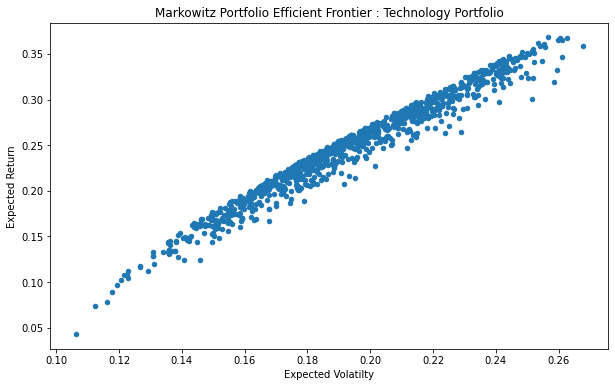

In [63]:
# creating a dataframe
pfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility':pfolio_volatilities})

# plotting the data
pfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.title('Markowitz Portfolio Efficient Frontier : Technology Portfolio')
plt.xlabel('Expected Volatilty')
plt.ylabel('Expected Return')

In [67]:
#show the expected results
variance = str( round(pfolio_variance, 2)* 100) + '%'
Risk = str( round(pfolio_risk, 2)* 100) + '%'
Return = str( round(pfolio_annual_return, 2)* 100) + '%'

print('Expected Annual Variance:', variance)
print('Expected Annual Risk:', Risk)
print('Expected Annual Return:', Return)

Expected Annual Variance: 4.0%
Expected Annual Risk: 19.0%
Expected Annual Return: 25.0%


In [68]:
pip install pyPortfolioOpt


     |████████████████████████████████| 60 kB 4.1 MB/s 
     |████████████████████████████████| 2.7 MB 17.9 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [69]:
# Backbacking 

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

In [71]:
# portfolio optimiztion
mean = expected_returns.mean_historical_return(stock)
S = risk_models.sample_cov(stock)

#calcalcate shapre ratio
sr = EfficientFrontier(mean, S)
weights = sr.max_sharpe()
clean_weights = sr.clean_weights()
print(clean_weights)
sr.portfolio_performance(verbose = True)

OrderedDict([('AMZN', 0.32586), ('AAPL', 0.67414), ('GOOG', 0.0), ('NFLIX', 0.0)])
Expected annual return: 42.3%
Annual volatility: 27.5%
Sharpe Ratio: 1.47


(0.4229378993610217, 0.2745924777065268, 1.4674032687511027)

In [72]:
pip install pyfolio

     |████████████████████████████████| 91 kB 5.1 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=8310011047818289741633ae6aedc9eb4f706a76dc0e945e24440ce53391a759
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39779 sha256=2331e5194e8518c1bcfcb54c36280cf9467a78162d9a1c3759f829c4c08a499e
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [73]:
import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


TypeError: ignored